## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Goal
 We're working with a real estate agency that helps customers buy and sell houses. Using Linear Regression to analyze the given dataset, we will help the agency determine which features of a house will increase the value the most. In turn, that will help the agency advise customers whether they should make renovations to the house, and which renovations they should consider.    

## Data
This project uses the King County House Sales dataset (kc_house_data.csv), which contains 21,597 different house entries. Each entry contains information about the house such as date sold, number of bedrooms and bathroom, total square footage, etc. A full  list and description of the column/variables can be found in column_names.md.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's open the csv file
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Let's check for null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
#Let's check the three variables to see what values they have to make sure it's safe to remove null values

In [6]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [7]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [8]:
df.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [9]:
#Looks safe to remove the null values since: 

#For waterfront there should only be "yes" or "no"
#For yr_renovated we don't want missing/unknown values
#For view we also don't want missing/unknown values

df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [10]:
#Let's check for duplicates as well

df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

# Baseline Model

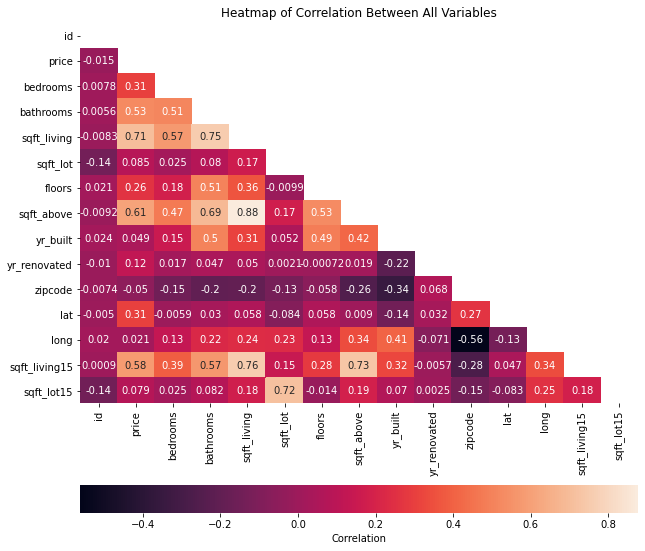

In [11]:
#Let's start off by creating a baseline model
#Let's look at the correlation strengths to find the variable with the strongest correlation with the target variable (price)
#We'll use a heatmap

correlation = df.corr()
#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

#### Looking at the variables correlated with price, it looks like the one most strongly correlated is sqft_living. Let's start creating our regression formula using price and sqft_living. ####

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Create our formula structure
form = "price~sqft_living"

#Fit our model with ols
model = ols(formula = form, data = df).fit()

#Look at model information
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:17:20   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.516e+04   5205.744    -10.597      0.000   -6.54e+04    -4.5e+04
sqft_living   286.1494      2.285    125.214      0.000     281.670     290.629
==============================================================================
Omnibus:                    11136.965   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457340.013
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      28.739   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print("R-Squared:", model.rsquared)
print(model.params)

R-Squared: 0.49870320658566647
Intercept     -55164.727008
sqft_living      286.149370
dtype: float64


## Let's check some regression assumptions ##

### 1. Linearity ###

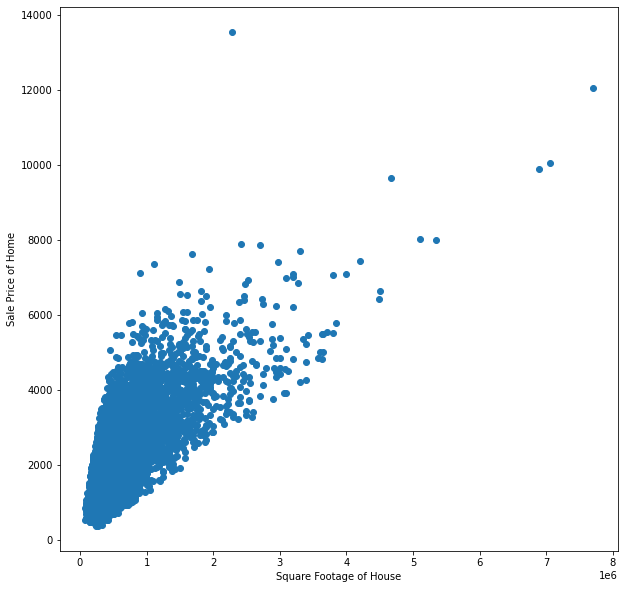

In [14]:
#Let's plot the relationship between price and sqft_living
plt.figure(figsize = (10,10))
plt.scatter(df.price, df.sqft_living);
plt.xlabel("Square Footage of House")
plt.ylabel("Sale Price of Home");

### 2. Normality ###

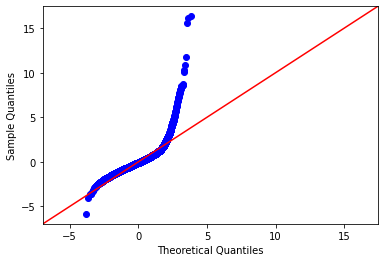

In [15]:
import scipy.stats as stats

#Let's plot the residuals against a standard normal distribution 
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

### 3. Homoscedasticity ###

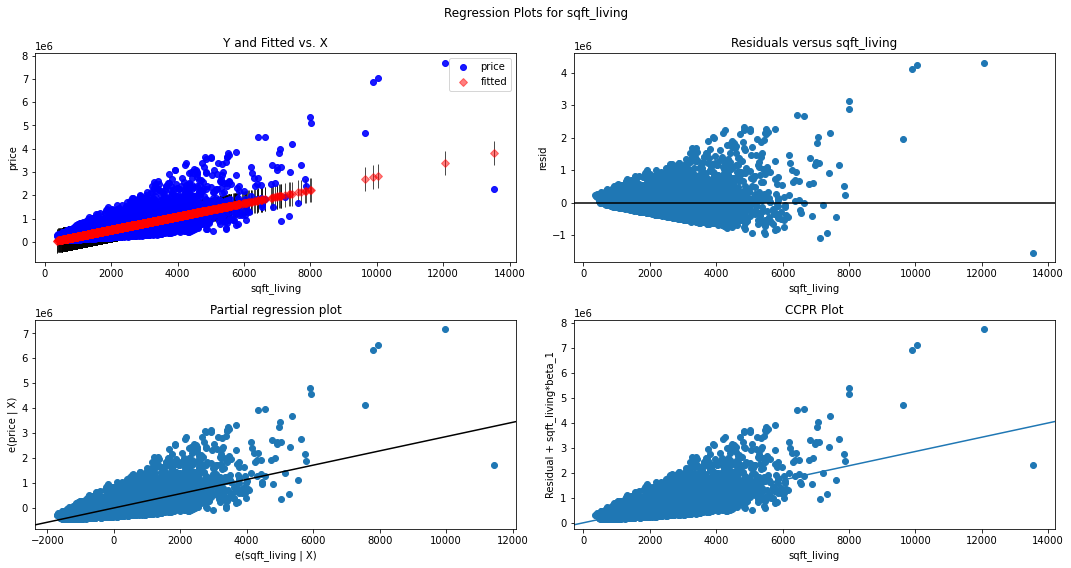

In [16]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig);

From testing our assumptions we can see:
* There is only a slight linear relationship between price and sqft_living
* The model residuals do not follow a full normal distribution
* For our regression plots for sqft_living, we see a cone shape which indicates heteroscedasticity


#### Since our R-squared is low and our regression assumptions are not met, we can say that sqft_living is not ideal for modeling a relationship with price. We will need to take a look at additional variables and build a better model. To do this requires multilinear regression. ####

# Second Model

In [17]:
#Let's take a look at our dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

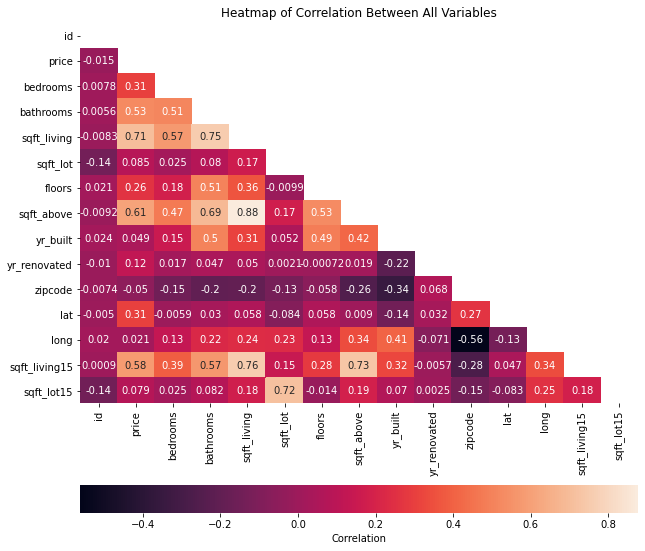

In [18]:
#There's a lot of variables so let's see if we can eliminate some variables
#First we'll create a heatmap to look at the correlation strengths
#We can also use this to check for multicollinearity
correlation = df.corr()

#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

### Looking at the heatmap correlation strengths, we can eliminate some low correlation variables:
* id (also a unique identifier which will not help us in the future for predictions)
* sqft_lot
* yr_renovated
* zipcode
* long
* lat (If we don't need longitude, it doesn't make sense to only put latitude)
* sqft_lot15 (We are not concerned about other neighbor's properties)

### We can eliminate some other variables as well:
* date (not in heatmap, but we're worried about the future and not the past)
* sqft_above (don't need this when we have total square footage)
* sqft_basement (not in heatmap, but sqft of basement is already included in sqft_living)
* sqft_living15 (we are not concerned about other neighbor's properties)


In [19]:
#Let's drop the variables
df.drop(columns = ["id","date", "sqft_lot", "sqft_above", "sqft_basement", "yr_renovated", "zipcode", "lat", "long", "sqft_lot15", "sqft_living15"], axis = 1, inplace = True)

In [20]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
1,538000.0,3,2.25,2570,2.0,NO,NONE,Average,7 Average,1951
3,604000.0,4,3.00,1960,1.0,NO,NONE,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,1.0,NO,NONE,Average,8 Good,1987
5,1230000.0,4,4.50,5420,1.0,NO,NONE,Average,11 Excellent,2001
6,257500.0,3,2.25,1715,2.0,NO,NONE,Average,7 Average,1995
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,NO,NONE,Average,8 Good,2008
21592,360000.0,3,2.50,1530,3.0,NO,NONE,Average,8 Good,2009
21593,400000.0,4,2.50,2310,2.0,NO,NONE,Average,8 Good,2014
21594,402101.0,2,0.75,1020,2.0,NO,NONE,Average,7 Average,2009


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        15762 non-null  float64
 1   bedrooms     15762 non-null  int64  
 2   bathrooms    15762 non-null  float64
 3   sqft_living  15762 non-null  int64  
 4   floors       15762 non-null  float64
 5   waterfront   15762 non-null  object 
 6   view         15762 non-null  object 
 7   condition    15762 non-null  object 
 8   grade        15762 non-null  object 
 9   yr_built     15762 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.3+ MB


#### Looks like we have a few categorical values, so let's convert them to numerical form



## 1. The waterfront variable



In [22]:
df["waterfront"].unique()

array(['NO', 'YES'], dtype=object)

In [23]:
#As we can see there are 2 values in the waterfont column: "NO", and "YES"
#Let's convert the waterfront values into numerical categories where 0 represents "NO" and 1 represents "YES"

df["waterfront"] = df["waterfront"].astype("category").cat.codes

In [24]:
df["waterfront"].unique()

array([0, 1], dtype=int8)

## 2. The view variable

In [25]:
df["view"].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [26]:
#Follow previous steps and convert to numerical category type
df["view"] = df["view"].astype("category").cat.codes

In [27]:
df["view"].unique()

array([4, 3, 1, 0, 2], dtype=int8)

## 3. The condition variable

In [28]:
df["condition"].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [29]:
#Convert to numerical category type
df["condition"] = df["condition"].astype("category").cat.codes

In [30]:
df["condition"].unique()

array([0, 4, 2, 3, 1], dtype=int8)

## 4. The grade variable

In [31]:
#We only want the number scores, and not the description.

#Let's create a function to edit the string entries
def keep_numbs(string):
    new_string = ''
    for i in string:
        if i.isdigit():
            new_string = new_string + i
    return new_string

In [32]:
df["grade"] = df["grade"].apply(keep_numbs)

#convert to numerical
df["grade"] = pd.to_numeric(df["grade"])

## Let's take a look at our DF

In [33]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
1,538000.0,3,2.25,2570,2.0,0,4,0,7,1951
3,604000.0,4,3.00,1960,1.0,0,4,4,7,1965
4,510000.0,3,2.00,1680,1.0,0,4,0,8,1987
5,1230000.0,4,4.50,5420,1.0,0,4,0,11,2001
6,257500.0,3,2.25,1715,2.0,0,4,0,7,1995
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,0,4,0,8,2008
21592,360000.0,3,2.50,1530,3.0,0,4,0,8,2009
21593,400000.0,4,2.50,2310,2.0,0,4,0,8,2014
21594,402101.0,2,0.75,1020,2.0,0,4,0,7,2009


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        15762 non-null  float64
 1   bedrooms     15762 non-null  int64  
 2   bathrooms    15762 non-null  float64
 3   sqft_living  15762 non-null  int64  
 4   floors       15762 non-null  float64
 5   waterfront   15762 non-null  int8   
 6   view         15762 non-null  int8   
 7   condition    15762 non-null  int8   
 8   grade        15762 non-null  int64  
 9   yr_built     15762 non-null  int64  
dtypes: float64(3), int64(4), int8(3)
memory usage: 1.0 MB


### Let's create two different DataFrames: One of our target variable (price) and one holding all our other variables

In [35]:
#Target Variable
Y = df["price"]
X = df.drop("price", axis = 1)

## Let's build our model

In [36]:
outcome = "price"
X_sum = "+".join(X.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = df).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     3272.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:17:23   Log-Likelihood:            -2.1624e+05
No. Observations:               15762   AIC:                         4.325e+05
Df Residuals:                   15752   BIC:                         4.326e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.711e+06   1.52e+05     44.289      0.000    6.41e+06    7.01e+06
bedrooms    -4.076e+04   2377.375    -17.143      0.000   -4.54e+04   -3.61e+04
bathrooms    5.178e+04   4061.206     12.751      0.000    4.38e+04    5.97e+04
sqft_living   177.0350      3.844     46.057      0.000     169.501     184.569
floors       2.594e+04   4066.507      6.380      0.000     1.8e+04    3.39e+04
waterfront   6.919e+05   2.09e+04     33.117      0.000    6.51e+05    7.33e+05
view        -2.543e+04   2046.702    -12.427      0.000   -2.94e+04   -2.14e+04
condition    9157.1740   1524.980      6.005      0.000    6168.038    1.21e+04
grade        1.235e+05   2552.220     48.393      0.000    1.19e+05    1.29e+05
yr_built    -3761.6494     79.708    -47.193      0.000   -3917.886   -3605.413
==============================================================================
Omnibus:                    12144.487   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           935404.199
Skew:                           3.106   Prob(JB):                         0.00
Kurtosis:                      40.225   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
print("R-Squared:", model.rsquared)
print(model.params)

R-Squared: 0.6515058835059588
Intercept      6.711156e+06
bedrooms      -4.075637e+04
bathrooms      5.178333e+04
sqft_living    1.770350e+02
floors         2.594354e+04
waterfront     6.918588e+05
view          -2.543485e+04
condition      9.157174e+03
grade          1.235098e+05
yr_built      -3.761649e+03
dtype: float64


#### From our results so far we can see that our variable P-values are all very low, suggesting that the relationships between those variables and the target variable price are statistically significant. We can also see that our R-squared value is .65, which says that changes in our dependent variable are 65% explained by changes in our independent variables. However, before we conclude that the model is sound, let's check some of our assumptions.  

## Assumptions for this model

### 1. Linearity

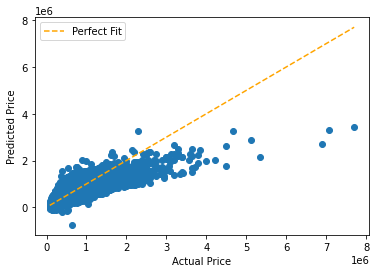

In [39]:
preds = model.predict(X)
fig,ax = plt.subplots()
perfect_line = np.arange(Y.min(), Y.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y, preds);
ax.set_xlabel("Actual Price");
ax.set_ylabel("Predicted Price");
ax.legend();

### 2. Normality

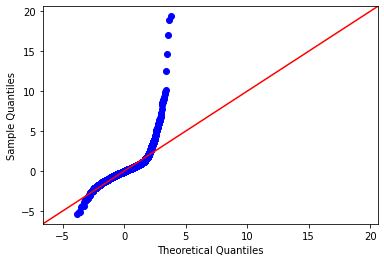

In [40]:
import scipy.stats as stats
residuals = (Y - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### 3. Homoscedasticity

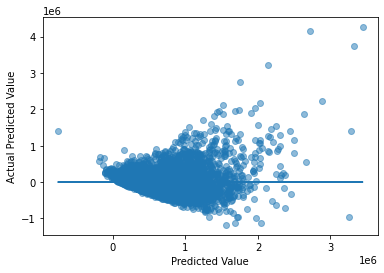

In [41]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

From testing our assumptions we can see:

* We have quite a few outliers, which disrupts the linear assumption.
* The model residuals do not follow a full normal distribution
* Our residuals form a cone shape which indicates heteroscedasticity

#### Let's see if we can adjust our model to fix any of the assumptions

# Third Model

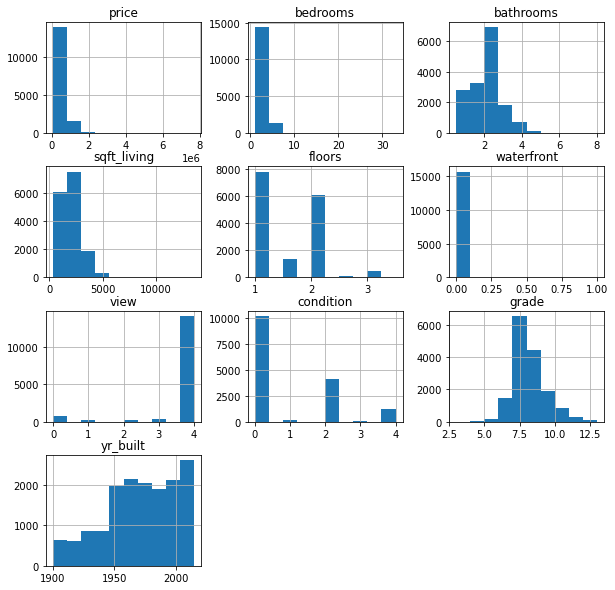

In [42]:
#Let's take a look at the distribution of the variables
df.hist(figsize = (10,10));

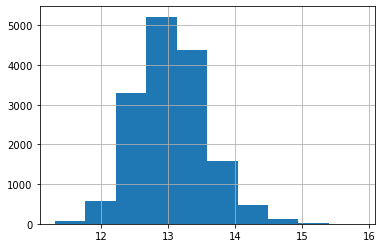

In [43]:
#Let's use log transformation on price to normalize the distribution and see how that effects our model
    
df["price"] = np.log(df["price"])
df["price"].hist();

In [45]:
Y_log = df["price"]
new_df = pd.concat([Y_log, X], axis = 1)

outcome = "price"
X_sum = "+".join(X.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3173.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:17:31   Log-Likelihood:                -4094.9
No. Observations:               15762   AIC:                             8210.
Df Residuals:                   15752   BIC:                             8286.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.9094      0.216    101.258      0.000      21.485      22.334
bedrooms       -0.0226      0.003     -6.654      0.000      -0.029      -0.016
bathrooms       0.0874      0.006     15.079      0.000       0.076       0.099
sqft_living     0.0002   5.49e-06     30.903      0.000       0.000       0.000
floors          0.0835      0.006     14.383      0.000       0.072       0.095
waterfront      0.4245      0.030     14.231      0.000       0.366       0.483
view           -0.0362      0.003    -12.388      0.000      -0.042      -0.030
condition       0.0171      0.002      7.872      0.000       0.013       0.021
grade           0.2217      0.004     60.835      0.000       0.215       0.229
yr_built       -0.0056      0.000    -49.163      0.000      -0.006      -0.005
==============================================================================
Omnibus:                       72.117   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.572
Skew:                          -0.130   Prob(JB):                     8.68e-18
Kurtosis:                       3.227   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking our assumptions again

### 1. Linearity

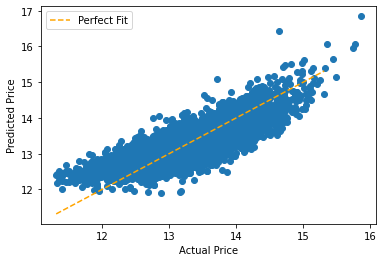

In [52]:
preds = model.predict(X)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### 2. Normality

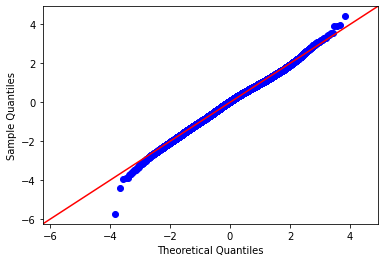

In [53]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### 3.  Homoscedasticity

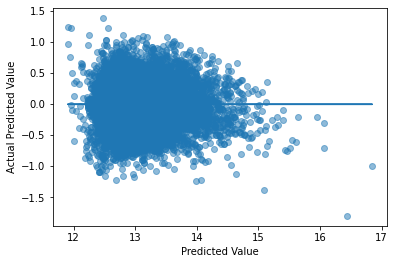

In [49]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

After log transforming our price variable we can see that:
* Our linearity assumption has drastically improved

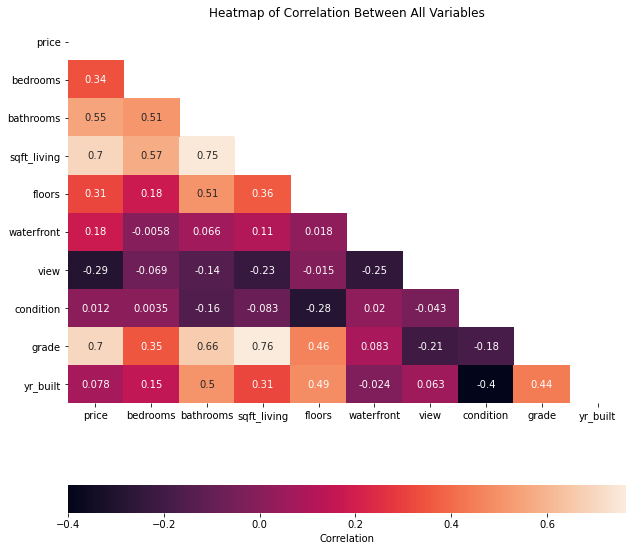

In [50]:
correlation = new_df.corr()

#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");